# The Gierer-Meinhardt Equations

The Gierer-Meinhardt Equations are a well-known nonlinear system of equations from mathematical biology. In this equation, there are two proteins: an activator and an inhibitor. These are protein signals from the cells within the organism which are used to coordinate behavior in the cell populations. These proteins diffuse and interact, and can be modeled by the following Semilinear Heat Equation:

\begin{align}
u_t & = D_1 \Delta u + \frac{au^2}{v} + \bar{u} - \alpha u \\
v_t & = D_2 \Delta v  + au^2 + \bar{v} - \beta v \\
\end{align}

In this equation, $u$ is a short-range autocatalytic protein (it activates itself), and $v$ is a short-range antagonist (it reduces the production rate of $u$). This requires the assumption that $D_1 \ll D_2 $. These equations have a steady state at

\begin{align}
u_{ss} & = \frac{\bar{u} + \beta}{\alpha} \\
v_{ss} & = \frac{\alpha u_{ss}^2}{\beta}  \\
\end{align}

The question we wish to investigate is: what happens if the protein concentrations are slightly away from steady state? To answer this, we will solve the equations numerically. In `/premades/premade_problems.jl` we see that there is already a HeatProblem for the Gierer-Meinhardt Equations:

In [1]:
"Example problem which solves the Gierer-Meinhardt equations wtih quasi-random initial perturbations."
function heatProblemExample_gierermeinhardt(;a=1,α=1,D=[0.01 1.0],ubar=1,vbar=0,β=10,startNoise=0.01)
  f₁(t,x,u)  = a*u[:,1].*u[:,1]./u[:,2] + ubar - α*u[:,1]
  f₂(t,x,u)  = a*u[:,1].*u[:,1] + vbar -β.*u[:,2]
  f(t,x,u) = [f₁(t,x,u) f₂(t,x,u)]
  uss = (ubar +β)/α
  vss = (α/β)*uss.^2
  u₀(x) = [uss*ones(size(x,1))+startNoise*rand(size(x,1)) vss*ones(size(x,1))] # size (x,2), 2 meaning 2 variables
  return(HeatProblem(u₀,f,D=D))
end

heatProblemExample_gierermeinhardt

Thus to solve the equations, we simply have to define the mesh and use `solve`.

In [13]:
using DifferentialEquations, Plots, ImageMagick

#Define a parabolic problem
T = .5
k = 4
Δx = 1/2^(k)
Δt = 1/2^(10)
mesh = parabolic_squaremesh([0 1 0 1],Δx,Δt,T,:neumann)
#prob = heatProblemExample_gierermeinhardt(a=1,α=1,D=[0.01 1.0],ubar=1,vbar=0,β=10) #Saddle
prob = heatProblemExample_gierermeinhardt(D=[9.45e-4 .27],a=10,α=64.5,β=100,ubar=.001) #Spots

sol = solve(mesh::FEMmesh,prob::HeatProblem,alg=:Euler,save_timeseries=true,timeseries_steps=10);

First, let's plot the solution.


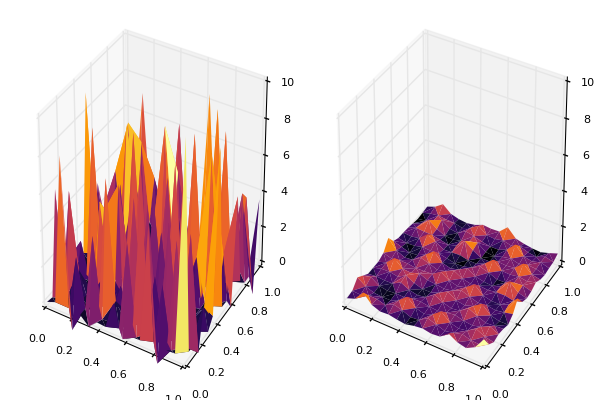

In [3]:
plot(sol,zlim=(0,10),cbar=false)

This looks a little insane! What happened to our code? Was it unstable? To see the solution in action, we use the animate function:

In [12]:
animate(sol,"../assets/gm_animation.gif",zlims=(0,10),cbar=false)

INFO: Saved animation to /home/crackauc/.julia/v0.5/DiffEqTutorials/assets/gm_animation.gif


Plots.AnimatedGif("/home/crackauc/.julia/v0.5/DiffEqTutorials/assets/gm_animation.gif")

From the animation we see that we start from a homogenous steady state, but this slight perturbation that we start with magnifies, until there are patterns that form. If we ran this equation for longer, we would see that the patterns stabilize. This forms spots of high and low concentration. This spontaneous change from a homogenous state to a pattern is called Turing Morphogenesis. It is believed to be a mechanism involved in pattern formation, such as how zebrafish get their stripes or how leopards get their spots.